# Getting Started with pandas

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## Introduction to pandas Data Structures

### Series

In [2]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [6]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [7]:
obj2['a']

-5

In [8]:
obj2['d'] = 6

In [9]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [10]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [11]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [12]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [13]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [14]:
'b' in obj2

True

In [15]:
'e' in obj2

False

In [16]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [17]:
obj3 = Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [18]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [19]:
obj4 = Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [20]:
 pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [21]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [22]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [23]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [24]:
obj4.name = 'population'

In [25]:
obj4.index.name = 'state'

In [26]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [27]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [28]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

In [29]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)

In [30]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [31]:
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [32]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
         index=['one', 'two', 'three', 'four', 'five'])

In [33]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [34]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [35]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [36]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [37]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [38]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [39]:
frame2['debt'] = np.arange(5.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


In [40]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [41]:
 frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [42]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [43]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [44]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [45]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [46]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [47]:
 pdata = {'Ohio': frame3['Ohio'][:-1],
          'Nevada': frame3['Nevada'][:2]}

In [48]:
DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


In [49]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [50]:
frame3.values

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

In [51]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7]], dtype=object)

### Index Objects

In [52]:
obj = Series(range(3), index=['a', 'b', 'c'])

In [53]:
index = obj.index

In [54]:
index[1:]

Index(['b', 'c'], dtype='object')

In [55]:
index[1] = 'd' # can’t be modified by the user

TypeError: Index does not support mutable operations

In [56]:
index = pd.Index(np.arange(3))

In [57]:
obj2 = Series([1.5, -2.5, 0], index=index)

In [58]:
 obj2.index is index

True

In [59]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [60]:
 'Ohio' in frame3.columns

True

In [61]:
2003 in frame3.index

False

## Essential Functionality

### Reindexing

In [62]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [63]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [64]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [67]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [68]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [81]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
        columns=['Ohio', 'Texas', 'California'])

In [82]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [71]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [72]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [73]:
states = ['Texas', 'Utah', 'California']

In [74]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [76]:
frame.reindex(index=['a', 'b', 'c', 'd'], method='ffill').reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
b,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [83]:
frame.loc[['a', 'b', 'c', 'd'], states]

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


### Dropping entries from an axis

In [84]:
 obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [85]:
new_obj = obj.drop('c')

In [86]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [87]:
obj # original object is not changed

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [88]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [89]:
data = DataFrame(np.arange(16).reshape((4, 4)),
         index=['Ohio', 'Colorado', 'Utah', 'New York'],
         columns=['one', 'two', 'three', 'four'])

In [90]:
 data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [91]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [92]:
 data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexing, selection, and filtering

In [93]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [94]:
obj['b']

1.0

In [95]:
obj[1]

1.0

In [96]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [97]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [98]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [99]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [100]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [101]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [102]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [103]:
obj['b':'c'] = 5

In [104]:
 obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [105]:
 data = DataFrame(np.arange(16).reshape((4, 4)),
        index=['Ohio', 'Colorado', 'Utah', 'New York'],
        columns=['one', 'two', 'three', 'four'])

In [106]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [107]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [108]:
 data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [109]:
 data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [110]:
 data[data < 5] = 0

In [112]:
 data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [113]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [114]:
data.ix[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [117]:
data.ix[:'Utah', ['two','three']]

,two,three
Ohio,0,0
Colorado,5,6
Utah,9,10


In [120]:
data.ix[data.three > 5, :3]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Arithmetic and data alignment

In [121]:
 df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
       index=['Ohio', 'Texas', 'Colorado'])

In [122]:
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
       index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [123]:
 df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [124]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [125]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### Arithmetic methods with fill values

In [126]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))

In [127]:
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [128]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [129]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [130]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [131]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [132]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### Operations between DataFrame and Series

In [133]:
arr = np.arange(12.).reshape((3, 4))

In [134]:
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [135]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [136]:
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

In [137]:
 frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
         index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [140]:
series = frame.iloc[0]

In [141]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [142]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [143]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [144]:
series2 = Series(range(3), index=['b', 'e', 'f'])

In [145]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [146]:
series3 = frame['d']

In [147]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [148]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [149]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function application and mapping

In [150]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
         index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [151]:
 frame

,b,d,e
Utah,-0.661738,0.053949,0.127813
Ohio,0.686659,0.385500,0.892034
Texas,1.200694,0.444068,0.031778
Oregon,-0.817377,1.276250,0.400404


In [152]:
np.abs(frame)

,b,d,e
Utah,0.661738,0.053949,0.127813
Ohio,0.686659,0.385500,0.892034
Texas,1.200694,0.444068,0.031778
Oregon,0.817377,1.276250,0.400404


### Function application and mapping

In [153]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
         index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [154]:
frame

,b,d,e
Utah,-2.318400,-1.617120,1.591294
Ohio,-1.300212,-0.340517,0.497600
Texas,-0.482060,-0.576738,-0.346338
Oregon,-1.914553,0.255562,-0.438953


In [155]:
np.abs(frame)

,b,d,e
Utah,2.318400,1.617120,1.591294
Ohio,1.300212,0.340517,0.497600
Texas,0.482060,0.576738,0.346338
Oregon,1.914553,0.255562,0.438953


In [156]:
f = lambda x: x.max() - x.min()

In [157]:
frame.apply(f) 

b    1.836339
d    1.872682
e    2.030247
dtype: float64

In [158]:
frame.apply(f, axis=1)

Utah      3.909694
Ohio      1.797812
Texas     0.230400
Oregon    2.170115
dtype: float64

In [159]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

In [160]:
frame.apply(f)

,b,d,e
min,-2.31840,-1.617120,-0.438953
max,-0.48206,0.255562,1.591294


In [161]:
format = lambda x: '%.2f' % x

In [162]:
frame.applymap(format)

,b,d,e
Utah,-2.32,-1.62,1.59
Ohio,-1.30,-0.34,0.50
Texas,-0.48,-0.58,-0.35
Oregon,-1.91,0.26,-0.44


In [172]:
frame['e'].map(format)

Utah       1.59
Ohio       0.50
Texas     -0.35
Oregon    -0.44
Name: e, dtype: object

### Sorting and ranking

In [170]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])

In [171]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [174]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
        columns=['d', 'a', 'b', 'c'])

In [175]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [176]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [177]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [180]:
obj = Series([4, 7, -3, 2])

In [183]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [184]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])

In [185]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [186]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [187]:
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [188]:
frame.sort_index(by='b')

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [189]:
frame.sort_index(by=['a', 'b'])

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [190]:
obj = Series([7, -5, 7, 4, 2, 0, 4])

In [191]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [192]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [194]:
obj.rank(ascending=False,method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [195]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
    'c': [-2, 5, 8, -2.5]})

In [196]:
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [197]:
frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


### Axis indexes with duplicate values

In [198]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [199]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [200]:
obj.index.is_unique

False

In [201]:
 obj['a'] 

a    0
a    1
dtype: int64

In [202]:
obj['c']

4

In [203]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [204]:
df

,0,1,2
a,1.001562,-0.564118,0.536693
a,-0.691835,0.683335,0.063844
b,1.160783,-0.757198,-0.269139
b,0.528501,-1.039427,1.243949


In [205]:
 df.ix['b']

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,0,1,2
b,1.160783,-0.757198,-0.269139
b,0.528501,-1.039427,1.243949


## Summarizing and Computing Descriptive Statistics

In [21]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
         [np.nan, np.nan], [0.75, -1.3]],
         index=['a', 'b', 'c', 'd'],
         columns=['one', 'two'])

In [22]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [23]:
 df.sum()

one    9.25
two   -5.80
dtype: float64

In [24]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [25]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [26]:
 df.idxmax()

one    b
two    d
dtype: object

In [27]:
 df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [28]:
 df.cumsum(axis = 1)

,one,two
a,1.40,NaN
b,7.10,2.60
c,NaN,NaN
d,0.75,-0.55


In [29]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [30]:
obj = Series(['a', 'a', 'b', 'c'] * 4)

In [31]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [32]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

### Correlation and Covariance

从0.19.0已经不再支持 pandas.io.data 和 pandas.io.wb，需将pandas.io换成pandas_datareader。
首先需要在命令行输入：pip install pandas-datareader
来安装pandas-datareader

In [35]:
import pandas_datareader.data as web

因为2017年Yahoo!被Verizon收购了，所以Yahoo! Finance已经不存在了，
这里我们使用自己的数据来学习函数

In [38]:
series1 = pd.Series(range(5), index=['day1', 'day2', 'day3', 'day4', 'day5'],
                    name='companyA')
series2 = pd.Series(sorted(range(5), reverse=True), 
                    index=['day1', 'day2', 'day3', 'day4', 'day5'], name='companyB')
df = pd.concat([series1, series2], axis=1)
df

,companyA,companyB
day1,0,4
day2,1,3
day3,2,2
day4,3,1
day5,4,0


In [39]:
df.cov()

,companyA,companyB
companyA,2.5,-2.5
companyB,-2.5,2.5


In [40]:
df.corr()

,companyA,companyB
companyA,1.0,-1.0
companyB,-1.0,1.0


In [42]:
df.companyA.corr(df.companyB)

-0.99999999999999989

In [43]:
df.companyA.cov(df.companyB)

-2.5

### Unique Values, Value Counts, and Membership

In [44]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [45]:
uniques = obj.unique()

In [46]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [47]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [48]:
pd.value_counts(obj.values, sort=False)

b    2
d    1
c    3
a    3
dtype: int64

In [49]:
mask = obj.isin(['b', 'c'])

In [50]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [51]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [52]:
 data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
    'Qu2': [2, 3, 1, 2, 3],
    'Qu3': [1, 5, 2, 4, 4]})

In [53]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [54]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## Handling Missing Data

In [55]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [56]:
string_data 

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [57]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

### Filtering Out Missing Data

In [58]:
from numpy import nan as NA

In [59]:
data = Series([1, NA, 3.5, NA, 7])

In [60]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [61]:
 data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [62]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
       [NA, NA, NA], [NA, 6.5, 3.]])

In [63]:
 cleaned = data.dropna()

In [64]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [65]:
 cleaned

,0,1,2
0,1.0,6.5,3.0


In [66]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [67]:
 data[4] = NA

In [68]:
data 

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [69]:
data.dropna(axis = 1, how = 'all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [70]:
df = DataFrame(np.random.randn(7, 3))

In [71]:
df.ix[:4, 1] = NA; df.ix[:2, 2] = NA

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [72]:
df

,0,1,2
0,-0.710694,NaN,NaN
1,-0.783118,NaN,NaN
2,0.416007,NaN,NaN
3,1.484435,NaN,0.456175
4,-0.439876,NaN,0.050861
5,0.068522,-0.616016,-0.158168
6,0.602869,-1.624612,0.420640


In [78]:
 df.dropna(thresh=3)

,0,1,2
5,0.068522,-0.616016,-0.158168
6,0.602869,-1.624612,0.420640


### Filling in Missing Data

In [79]:
df.fillna(0)

,0,1,2
0,-0.710694,0.000000,0.000000
1,-0.783118,0.000000,0.000000
2,0.416007,0.000000,0.000000
3,1.484435,0.000000,0.456175
4,-0.439876,0.000000,0.050861
5,0.068522,-0.616016,-0.158168
6,0.602869,-1.624612,0.420640


In [82]:
 df.fillna({1: 0.5, 3: -1})

,0,1,2
0,-0.710694,0.500000,NaN
1,-0.783118,0.500000,NaN
2,0.416007,0.500000,NaN
3,1.484435,0.500000,0.456175
4,-0.439876,0.500000,0.050861
5,0.068522,-0.616016,-0.158168
6,0.602869,-1.624612,0.420640


In [83]:
 _ = df.fillna(0, inplace=True)

In [84]:
df

,0,1,2
0,-0.710694,0.000000,0.000000
1,-0.783118,0.000000,0.000000
2,0.416007,0.000000,0.000000
3,1.484435,0.000000,0.456175
4,-0.439876,0.000000,0.050861
5,0.068522,-0.616016,-0.158168
6,0.602869,-1.624612,0.420640


In [85]:
df = DataFrame(np.random.randn(6, 3))

In [86]:
df.ix[2:, 1] = NA; df.ix[4:, 2] = NA

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [87]:
df.fillna(method='ffill')

,0,1,2
0,-0.681048,0.098007,-1.168512
1,-0.892424,-0.953258,-0.058370
2,1.665259,-0.953258,0.870978
3,-0.194471,-0.953258,1.075426
4,-1.323397,-0.953258,1.075426
5,-0.743027,-0.953258,1.075426


In [88]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.681048,0.098007,-1.168512
1,-0.892424,-0.953258,-0.058370
2,1.665259,-0.953258,0.870978
3,-0.194471,-0.953258,1.075426
4,-1.323397,NaN,1.075426
5,-0.743027,NaN,1.075426


In [89]:
 data = Series([1., NA, 3.5, NA, 7])

In [90]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## Hierarchical Indexing

In [7]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [8]:
data = Series(np.random.randn(10),
     index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
      [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])

In [9]:
data

a  1   -0.325298
   2    2.010787
   3    1.615848
b  1    0.551714
   2   -0.129806
   3    0.136980
c  1   -1.295388
   2   -0.365206
d  2    1.330943
   3   -0.915720
dtype: float64

In [10]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

In [11]:
data['b']

1    0.551714
2   -0.129806
3    0.136980
dtype: float64

In [12]:
data['b':'c']

b  1    0.551714
   2   -0.129806
   3    0.136980
c  1   -1.295388
   2   -0.365206
dtype: float64

In [13]:
data.loc[['b', 'd']]

b  1    0.551714
   2   -0.129806
   3    0.136980
d  2    1.330943
   3   -0.915720
dtype: float64

In [14]:
data[:, 2]

a    2.010787
b   -0.129806
c   -0.365206
d    1.330943
dtype: float64

In [15]:
data.unstack()

,1,2,3
a,-0.325298,2.010787,1.615848
b,0.551714,-0.129806,0.136980
c,-1.295388,-0.365206,NaN
d,NaN,1.330943,-0.915720


In [16]:
data.unstack().stack()

a  1   -0.325298
   2    2.010787
   3    1.615848
b  1    0.551714
   2   -0.129806
   3    0.136980
c  1   -1.295388
   2   -0.365206
d  2    1.330943
   3   -0.915720
dtype: float64

In [17]:
 frame = DataFrame(np.arange(12).reshape((4, 3)),
     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
      columns=[['Ohio', 'Ohio', 'Colorado'],
       ['Green', 'Red', 'Green']])

In [18]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [19]:
frame.index.names = ['key1', 'key2']

In [20]:
frame.columns.names = ['state', 'color']

In [21]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [22]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [23]:
MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
names=['state', 'color'])

NameError: name 'MultiIndex' is not defined

### Reordering and Sorting Levels

In [24]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [25]:
frame.sortlevel(1)

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [26]:
frame.swaplevel(0, 1).sortlevel(0)

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Summary Statistics by Level

In [27]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [28]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### Using a DataFrame’s Columns

In [29]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
  'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
  'd': [0, 1, 2, 0, 1, 2, 3]})

In [30]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [31]:
frame2 = frame.set_index(['c', 'd'])

In [32]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [33]:
 frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [34]:
 frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Other pandas Topics

### Integer Indexing

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [2]:
ser = Series(np.arange(3.))
ser[-1]

KeyError: -1

In [3]:
ser2 = Series(np.arange(3.), index=['a', 'b', 'c'])

In [4]:
 ser2[-1]

2.0

In [5]:
ser.ix[:1]

d:\program files\python 3.5\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0    0.0
1    1.0
dtype: float64

In [6]:
ser3 = Series(range(3), index=[-5, 1, 3])

纠错，iget_value和irow已经弃用，手册给出如下替换函数

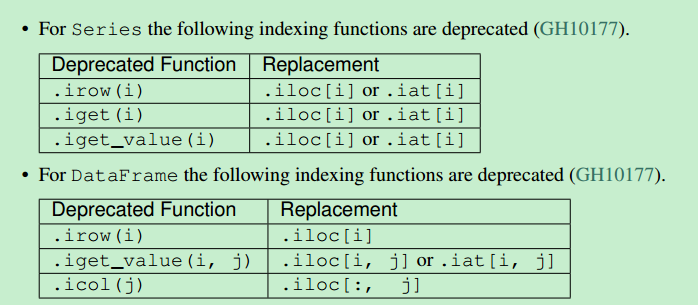

In [10]:
from IPython.display import Image
Image(filename='iget_value.png')

In [9]:
ser3.iloc[2]

2

In [12]:
frame = DataFrame(np.arange(6).reshape(3, 2), index=[2, 0, 1])

In [16]:
frame

,0,1
2,0,1
0,2,3
1,4,5


In [18]:
frame.iloc[0]

0    0
1    1
Name: 2, dtype: int32

### Panel Data

不介绍